# Selection of the best model

## 1. Importing all the necessary modules 

In [462]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression,Lasso,ElasticNet,Ridge,RANSACRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import GradientBoostingRegressor,RandomForestClassifier,RandomForestRegressor

from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV

from sklearn.datasets import load_iris,make_regression

from sklearn.feature_selection import SelectKBest,chi2,VarianceThreshold,SelectFromModel

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_log_error,accuracy_score,average_precision_score

from sklearn.utils import shuffle

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler,OneHotEncoder

from sklearn.compose import ColumnTransformer

from catboost import CatBoostRegressor

from xgboost import XGBRegressor

from sklearn.svm import SVR

import pickle

## 2. Reading the training data

In [263]:
data_xls = pd.read_excel('Train_dataset.xlsx', 'Train_dataset', index_col=None)
data_xls.to_csv('Train_dataset(P1).csv', encoding='utf-8')

In [264]:
data_xls = pd.read_excel('Train_dataset.xlsx', 'Diuresis_TS', index_col=None)
data_xls.to_csv('Train_dataset(P2).csv', encoding='utf-8')

In [265]:
data=pd.read_csv("Train_dataset(P1).csv",index_col=[0])

In [266]:
Diuresis_data=pd.read_csv("Train_dataset(P2).csv",index_col=[0])

## 3. Data Analysis

In [267]:
data.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1.0,Farmer,Public,2,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2.0,Farmer,Walk,2,...,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1.0,Cleaner,Public,2,...,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.0,Driver,Car,2,...,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,Bhubaneshwar,Female,Mrs,champa karketta,NO,2.0,Manufacturing,Car,2,...,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


In [268]:
Diuresis_data.head()

,people_ID,2020-03-20 00:00:00,2020-03-21 00:00:00,2020-03-22 00:00:00,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-25 00:00:00,2020-03-26 00:00:00
0,1,441,544.2,669.64,821.368,1002.2416,1215.68992,1472.627904
1,2,151,197.2,253.24,321.688,399.9256,492.91072,606.892864
2,3,416,515.2,632.44,776.728,947.7736,1150.32832,1395.793984
3,4,410,506.0,621.40,761.880,928.1560,1126.78720,1368.344640
4,5,390,483.0,595.00,730.200,892.8400,1084.40800,1315.889600


In [269]:
data.isna().sum()

people_ID                    0
Region                       0
Gender                       0
Designation                  0
Name                        20
Married                      0
Children                   311
Occupation                 747
Mode_transport               3
cases/1M                     0
Deaths/1M                    0
comorbidity                226
Age                          0
Coma score                   0
Pulmonary score              0
cardiological pressure      97
Diuresis                   716
Platelets                  924
HBB                         16
d-dimer                   1114
Heart rate                1114
HDL cholesterol             35
Charlson Index               0
Blood Glucose                0
Insurance                 1090
salary                       0
FT/month                   723
Infect_Prob                  0
dtype: int64

In [270]:
data["Diuresis"]=Diuresis_data["2020-03-20 00:00:00"]
data.isna().sum()

people_ID                    0
Region                       0
Gender                       0
Designation                  0
Name                        20
Married                      0
Children                   311
Occupation                 747
Mode_transport               3
cases/1M                     0
Deaths/1M                    0
comorbidity                226
Age                          0
Coma score                   0
Pulmonary score              0
cardiological pressure      97
Diuresis                     0
Platelets                  924
HBB                         16
d-dimer                   1114
Heart rate                1114
HDL cholesterol             35
Charlson Index               0
Blood Glucose                0
Insurance                 1090
salary                       0
FT/month                   723
Infect_Prob                  0
dtype: int64

In [271]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10714 entries, 0 to 10713
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   people_ID               10714 non-null  int64  
 1   Region                  10714 non-null  object 
 2   Gender                  10714 non-null  object 
 3   Designation             10714 non-null  object 
 4   Name                    10694 non-null  object 
 5   Married                 10714 non-null  object 
 6   Children                10403 non-null  float64
 7   Occupation              9967 non-null   object 
 8   Mode_transport          10711 non-null  object 
 9   cases/1M                10714 non-null  int64  
 10  Deaths/1M               10714 non-null  int64  
 11  comorbidity             10488 non-null  object 
 12  Age                     10714 non-null  int64  
 13  Coma score              10714 non-null  int64  
 14  Pulmonary score         10714 non-null

### Converting object or string data to category

In [272]:
def to_category(data):
    for label,content in data.items():
        if pd.api.types.is_string_dtype(content):
            data[label]=content.astype("category").cat.as_ordered()
    return data        

In [273]:
data=to_category(data)

In [274]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10714 entries, 0 to 10713
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   people_ID               10714 non-null  int64   
 1   Region                  10714 non-null  category
 2   Gender                  10714 non-null  category
 3   Designation             10714 non-null  category
 4   Name                    10694 non-null  category
 5   Married                 10714 non-null  category
 6   Children                10403 non-null  float64 
 7   Occupation              9967 non-null   category
 8   Mode_transport          10711 non-null  category
 9   cases/1M                10714 non-null  int64   
 10  Deaths/1M               10714 non-null  int64   
 11  comorbidity             10488 non-null  category
 12  Age                     10714 non-null  int64   
 13  Coma score              10714 non-null  int64   
 14  Pulmonary score       

### To fill numerical Nan with median of data

In [275]:
def numericfill(data):
    for label,content in data.items():
        if pd.api.types.is_numeric_dtype(content):
            #if pd.isnull(content).sum():
            #data[label+"_is_missing"]=pd.isnull(content)
            data[label]=content.fillna(content.median())
    return data

In [276]:
data=numericfill(data)

In [277]:
data.isna().sum()

people_ID                   0
Region                      0
Gender                      0
Designation                 0
Name                       20
Married                     0
Children                    0
Occupation                747
Mode_transport              3
cases/1M                    0
Deaths/1M                   0
comorbidity               226
Age                         0
Coma score                  0
Pulmonary score             0
cardiological pressure     97
Diuresis                    0
Platelets                   0
HBB                         0
d-dimer                     0
Heart rate                  0
HDL cholesterol             0
Charlson Index              0
Blood Glucose               0
Insurance                   0
salary                      0
FT/month                    0
Infect_Prob                 0
dtype: int64

In [278]:
for label,content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Name
Occupation
Mode_transport
comorbidity
cardiological pressure


### To convert categorical data to its codes

In [279]:
def categoryfill(data):
    for label,content in data.items():
         if not pd.api.types.is_numeric_dtype(content):
            #if content.isna().sum():
                #data[label+"_is_missing"]=pd.isnull(content)
            data[label]=pd.Categorical(content).codes+1
               # data[label]=data[label].cat.codes
    return data

In [280]:
data=categoryfill(data)

In [281]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10714 entries, 0 to 10713
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   people_ID               10714 non-null  int64  
 1   Region                  10714 non-null  int8   
 2   Gender                  10714 non-null  int8   
 3   Designation             10714 non-null  int8   
 4   Name                    10714 non-null  int16  
 5   Married                 10714 non-null  int8   
 6   Children                10714 non-null  float64
 7   Occupation              10714 non-null  int8   
 8   Mode_transport          10714 non-null  int8   
 9   cases/1M                10714 non-null  int64  
 10  Deaths/1M               10714 non-null  int64  
 11  comorbidity             10714 non-null  int8   
 12  Age                     10714 non-null  int64  
 13  Coma score              10714 non-null  int64  
 14  Pulmonary score         10714 non-null

In [282]:
data=shuffle(data)
data.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
7388,14495,3,2,1,228,2,0.0,1,3,2,...,69.0,342.0,55.0,37.0,0,6,2400000.0,1700000,0.0,45.508346
3999,5683,5,1,2,4403,2,2.0,9,3,4,...,156.0,296.0,56.0,69.0,27,4,4000000.0,400000,0.0,51.488284
462,463,2,1,2,3285,1,2.0,4,1,2,...,95.0,283.0,73.0,55.0,4,5,300000.0,2000000,1.0,64.437120
8124,15231,4,2,1,3078,2,0.0,5,1,1,...,191.0,346.0,75.0,35.0,39,7,2900000.0,2200000,1.0,48.779039
501,502,2,1,2,4228,2,0.0,3,3,2,...,165.0,265.0,57.0,68.0,3,4,800000.0,1700000,1.0,46.006457


### Now drop the unecessary columns from the table

In [283]:
data=data.drop("people_ID",axis=1)

In [284]:
data=data.drop("Name",axis=1)

### Analyse the data

Text(0, 0.5, 'Infect_Prob')

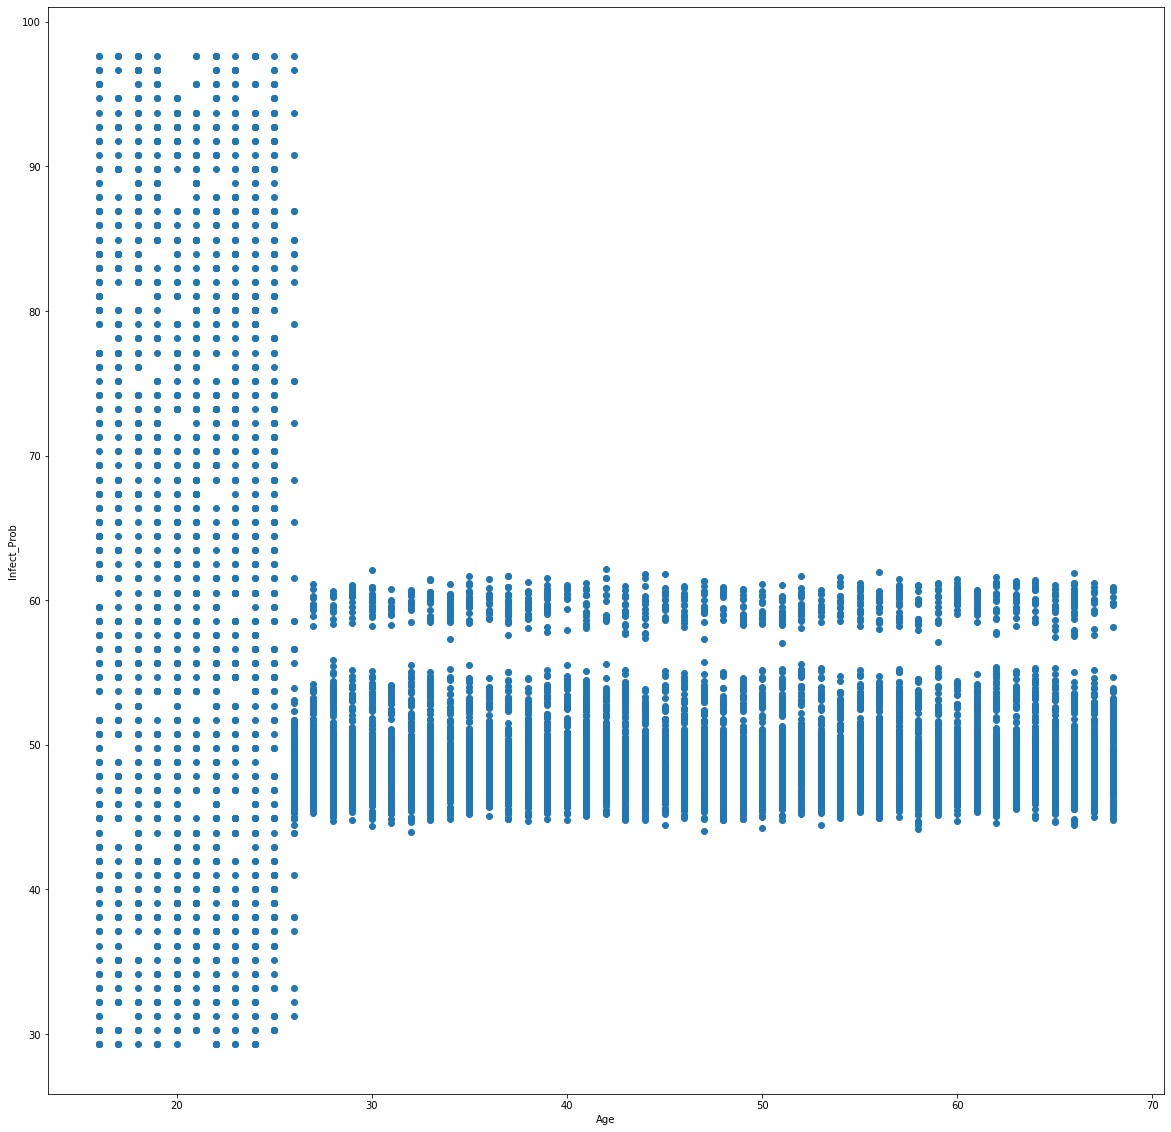

In [285]:
plt.figure(figsize=(20,20))
plt.scatter(data["Age"],data["Infect_Prob"])
plt.xlabel("Age")
plt.ylabel("Infect_Prob")

Text(0, 0.5, 'Infect_Prob')

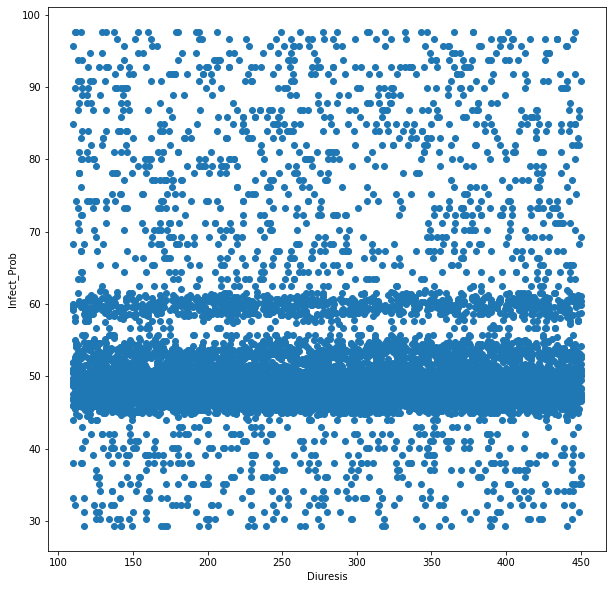

In [286]:
plt.figure(figsize=(10,10))
plt.scatter(data["Diuresis"],data["Infect_Prob"])
plt.xlabel("Diuresis")
plt.ylabel("Infect_Prob")

Text(0, 0.5, 'Infect_Prob')

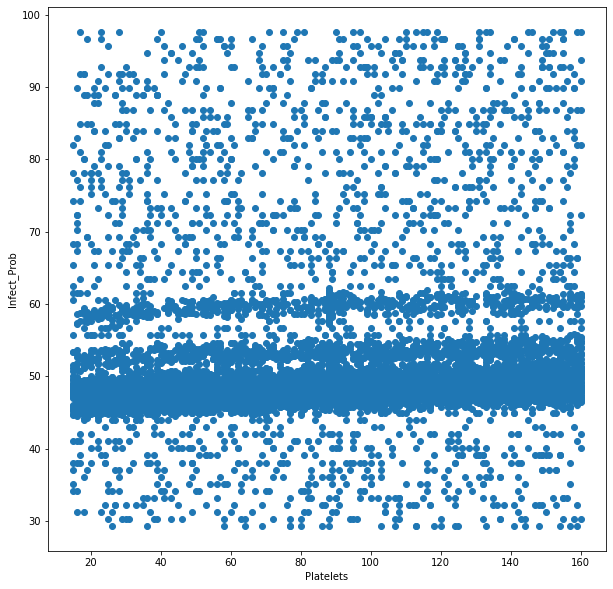

In [287]:
plt.figure(figsize=(10,10))
plt.scatter(data["Platelets"],data["Infect_Prob"])
plt.xlabel("Platelets")
plt.ylabel("Infect_Prob")

### Splitting the data

In [288]:
def split(data):
    x=data.drop("Infect_Prob",axis=1)
    y=data["Infect_Prob"]
    xtr,xva,ytr,yva=train_test_split(x,y,test_size=0.2)
    return x,y,xtr,xva,ytr,yva

In [289]:
x,y,xtr,xva,ytr,yva=split(data)

In [253]:
len(xtr),len(ytr),len(xva),len(yva)

(8571, 8571, 2143, 2143)

## 4. Selecting the best model

### 1. Using Pipelines

In [229]:
%%time
pipelines = []
pipelines.append(('RAN', Pipeline([('RAN', RANSACRegressor())])))
pipelines.append(('EN', Pipeline([('EN', ElasticNet())])))
pipelines.append(('L', Pipeline([('L', Lasso())])))
pipelines.append(('DTR', Pipeline([('DTR', DecisionTreeRegressor())])))
pipelines.append(('KNR', Pipeline([('KNR', KNeighborsRegressor())])))
pipelines.append(('LR', Pipeline([('LR', LinearRegression())])))
pipelines.append(('Rid', Pipeline([('Rid', Ridge())])))
pipelines.append(('CBR', Pipeline([('CBR', CatBoostRegressor())])))
pipelines.append(('RFR', Pipeline([('RFR', RandomForestRegressor())])))
pipelines.append(('XGBR', Pipeline([('XGBR', XGBRegressor())])))
pipelines.append(('GBR', Pipeline([('GBM', GradientBoostingRegressor())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, xtr, ytr, cv=kfold, scoring='r2',n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\asus\MachineLearning\Covid\env\lib\site-packages\sklearn\model_selection\_split.py:292: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


RAN: -0.277263 (0.469932)
EN: 0.183076 (0.023365)
L: 0.169707 (0.020887)
DTR: -0.370823 (0.165924)
KNR: -0.165117 (0.050199)
LR: 0.283268 (0.038574)
Rid: 0.283275 (0.038532)
CBR: 0.242796 (0.053164)
RFR: 0.313472 (0.043750)
XGBR: 0.167193 (0.049208)
GBR: 0.308504 (0.041298)
Wall time: 2min


Since the best models are the RandomForestReggressor and the GradientBoostingRegressor we will test the best amongst them

## Using RandomForestRegressor

* Better r2_score
* Better feature_importances distributed
* Overall the best model
* rs_model : RandomSearchCV model is the final model used

In [365]:
model=RandomForestRegressor(n_jobs=-1,random_state=42)
model.fit(xtr,ytr)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=15,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [366]:
model.score(xva,yva)

0.3611634337003832

In [367]:
cross_val_score(model,x,y,cv=5,n_jobs=-1).mean()

0.3314255740680981

#### Getting the feature_importances_

<BarContainer object of 25 artists>

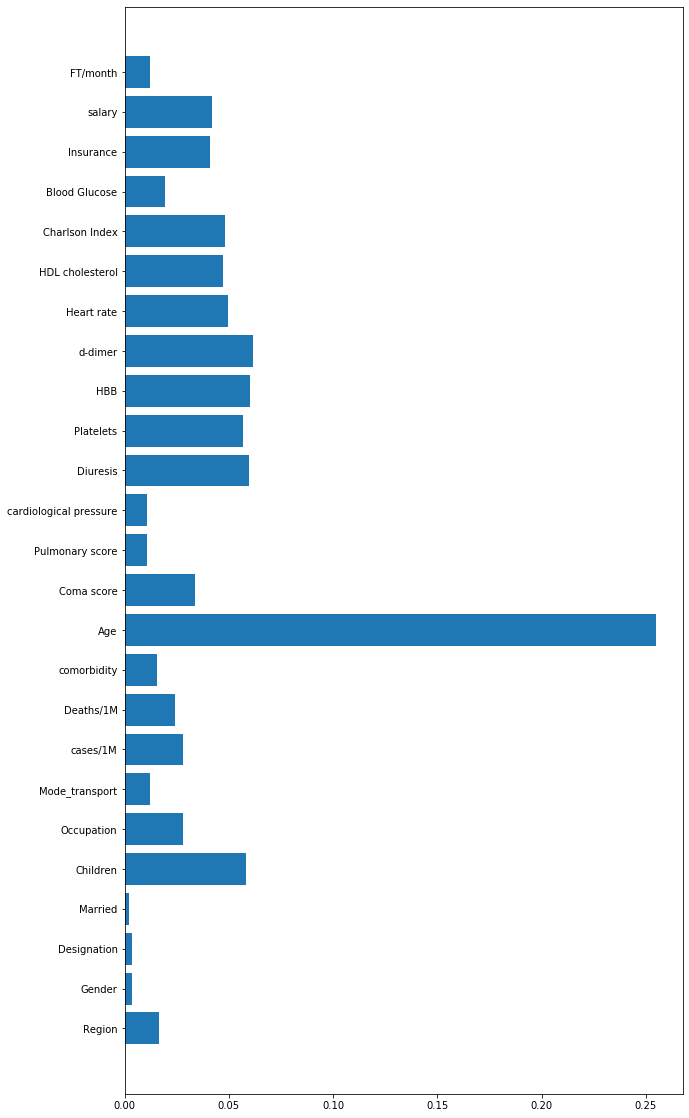

In [179]:
plt.figure(figsize=(10,20))
plt.barh((pd.DataFrame(x)).columns,model1.feature_importances_)

In [421]:
%%time
from sklearn.model_selection import RandomizedSearchCV
rf_grid = {"n_estimators": np.arange(100, 1100, 100),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"]}

rs_model = RandomizedSearchCV(RandomForestRegressor(random_state=42),
                              param_distributions=rf_grid,
                              n_iter=100,
                              cv=5,
                              verbose=True,n_jobs=-1)

rs_model.fit(x, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  9.9min finished


Wall time: 10min 17s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [422]:
rs_model.best_params_

{'n_estimators': 900,
 'min_samples_split': 16,
 'min_samples_leaf': 19,
 'max_features': 0.5,
 'max_depth': 10}

In [423]:
rs_model.score(xva,yva)

0.4882559546581543

### Removing data with correlation

In [290]:
def rem_corr(data):
    correlation=data.corr().abs()
    upper=correlation.where(np.triu(np.ones(correlation.shape),k=1).astype(np.bool))
    drop=[column for column in upper.columns if any(upper[column]>0.9)]
    df=data.drop(drop,axis=1)
    return df

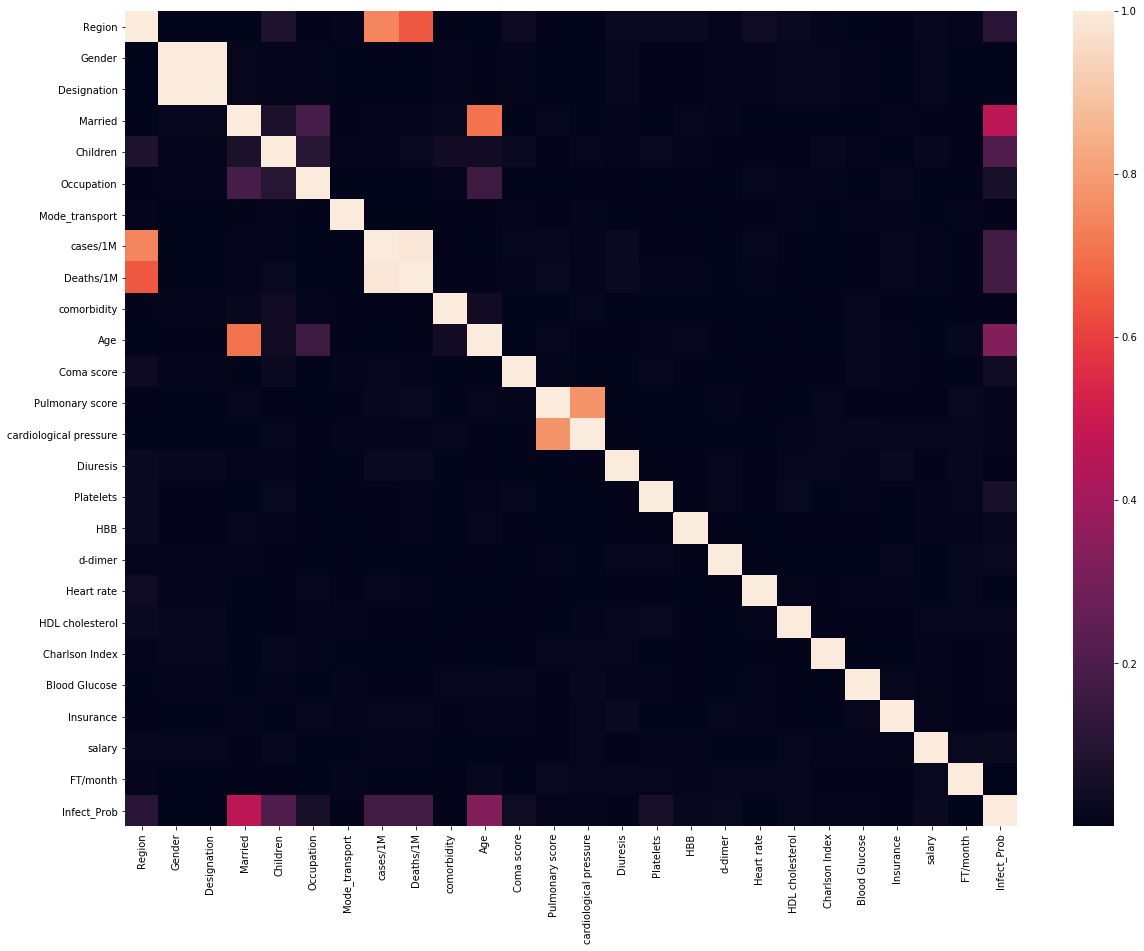

In [246]:
plt.figure(figsize=(20,15))
sns.heatmap(correlation)

## Using GradientBoostingRegressor

* feature_importances_ not distributed well
* Less r2_score
* Not finally used

In [409]:
gbr_model=GradientBoostingRegressor(random_state=42,learning_rate=0.06,n_estimators=67)
gbr_model.fit(xtr,ytr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.06, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=66,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [406]:
cross_val_score(gbr_model,x,y,cv=5).mean()

0.3289180220854995

In [411]:
cross_val_score(gbr_model,x,y,cv=5).mean()

0.3288851106471863

In [832]:
gbr_model.feature_importances_.shape

(27,)

<BarContainer object of 25 artists>

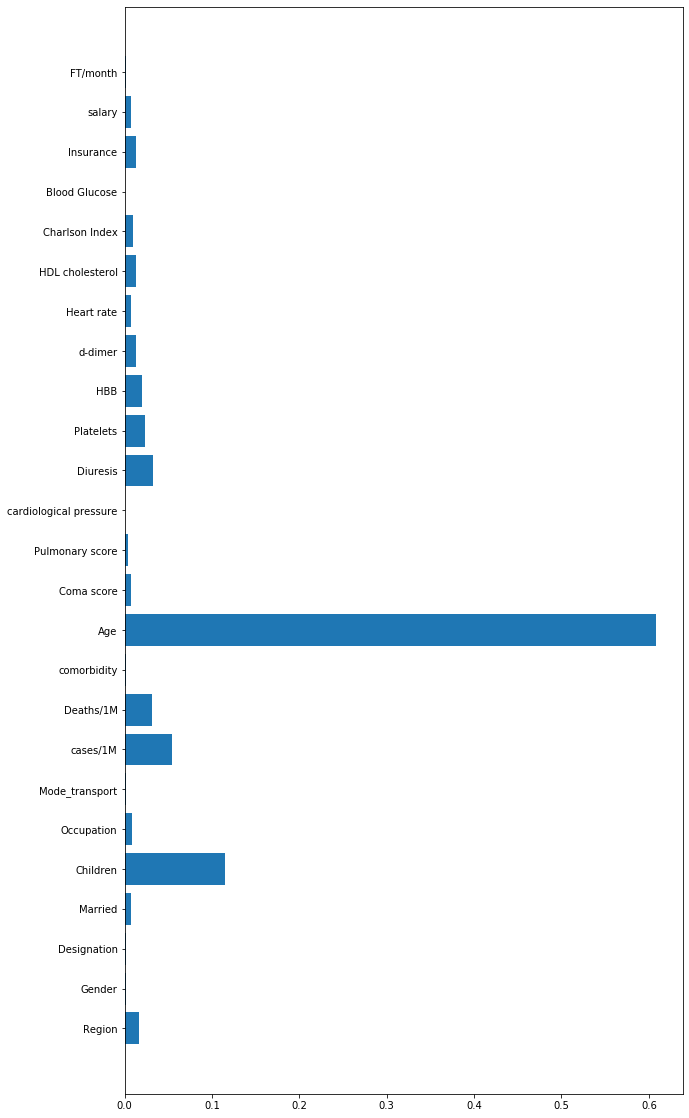

In [335]:
plt.figure(figsize=(10,20))
plt.barh(x.columns, gbr_model.feature_importances_)

## By OneHotEncoding 

* Does not effect the score
* Makes the fitting slow
* Not Applied in the model

In [295]:
datao=pd.read_csv("Train_dataset(P1).csv",index_col=[0])

In [297]:
datao.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1.0,Farmer,Public,2,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2.0,Farmer,Walk,2,...,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1.0,Cleaner,Public,2,...,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.0,Driver,Car,2,...,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,Bhubaneshwar,Female,Mrs,champa karketta,NO,2.0,Manufacturing,Car,2,...,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


In [300]:
for label,content in datao.items():
    if pd.api.types.is_string_dtype(content):
        if content.isna().sum():
            print(label)
            datao[label]=content.fillna("missing")

Name
Occupation
Mode_transport
comorbidity
cardiological pressure


In [303]:
datao["Diuresis"]=Diuresis_data["2020-03-20 00:00:00"]

In [304]:
datao.isna().sum()

people_ID                    0
Region                       0
Gender                       0
Designation                  0
Name                         0
Married                      0
Children                   311
Occupation                   0
Mode_transport               0
cases/1M                     0
Deaths/1M                    0
comorbidity                  0
Age                          0
Coma score                   0
Pulmonary score              0
cardiological pressure       0
Diuresis                     0
Platelets                  924
HBB                         16
d-dimer                   1114
Heart rate                1114
HDL cholesterol             35
Charlson Index               0
Blood Glucose                0
Insurance                 1090
salary                       0
FT/month                   723
Infect_Prob                  0
dtype: int64

In [306]:
datao=numericfill(datao)
datao

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1.0,Farmer,Public,2,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2.0,Farmer,Walk,2,...,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1.0,Cleaner,Public,2,...,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.0,Driver,Car,2,...,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,Bhubaneshwar,Female,Mrs,champa karketta,NO,2.0,Manufacturing,Car,2,...,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10709,22691,Bengaluru,Male,Mr,ashish,NO,2.0,Business,Car,8,...,24.0,209.0,61.0,56.0,35,7,4000000.0,300000,0.0,41.981760
10710,22692,Bengaluru,Male,Mr,mohd mujahid ansari,YES,0.0,Manufacturing,Car,8,...,134.0,211.0,65.0,47.0,35,7,1500000.0,700000,1.0,47.148663
10711,22693,Bengaluru,Male,Mr,munnakumar,YES,0.0,Clerk,Public,8,...,151.0,296.0,87.0,37.0,16,5,3000000.0,2100000,2.0,47.708533
10712,22694,Bengaluru,Male,Mr,prakash,YES,1.0,Legal,Walk,8,...,110.0,253.0,56.0,70.0,28,5,2900000.0,700000,1.0,53.803565


In [308]:
datao=shuffle(datao)
x1=datao.drop("Infect_Prob",axis=1)
y1=datao["Infect_Prob"]



In [311]:
col=[]
for label,content in datao.items():
    if pd.api.types.is_string_dtype(content):
        col.append(label)

In [312]:
col

['Region',
 'Gender',
 'Designation',
 'Name',
 'Married',
 'Occupation',
 'Mode_transport',
 'comorbidity',
 'Pulmonary score',
 'cardiological pressure']

In [313]:
one=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one,['Region',
 'Gender',
 'Designation',
 'Name',
 'Married',
 'Occupation',
 'Mode_transport',
 'comorbidity',
 'Pulmonary score',
 'cardiological pressure'])],remainder="passthrough")
tx1=transformer.fit_transform(x1).toarray()

In [315]:
tx1

array([[1.0e+00, 0.0e+00, 0.0e+00, ..., 1.3e+06, 5.0e+05, 0.0e+00],
       [0.0e+00, 0.0e+00, 1.0e+00, ..., 4.1e+06, 1.3e+06, 1.0e+00],
       [1.0e+00, 0.0e+00, 0.0e+00, ..., 4.3e+06, 3.0e+05, 1.0e+00],
       ...,
       [0.0e+00, 0.0e+00, 1.0e+00, ..., 1.7e+06, 1.5e+06, 0.0e+00],
       [1.0e+00, 0.0e+00, 0.0e+00, ..., 5.0e+05, 2.3e+06, 1.0e+00],
       [0.0e+00, 0.0e+00, 1.0e+00, ..., 4.8e+06, 1.8e+06, 1.0e+00]])

In [317]:
tx1=pd.DataFrame(tx1)
tx1

,0,1,2,3,4,5,6,7,8,9,...,6351,6352,6353,6354,6355,6356,6357,6358,6359,6360
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,88.0,48.0,276.0,75.0,66.0,34.0,5.0,1300000.0,500000.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,79.0,134.0,294.0,81.0,60.0,32.0,4.0,4100000.0,1300000.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,86.0,92.0,276.0,98.0,41.0,6.0,3.0,4300000.0,300000.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,119.0,202.0,338.0,50.0,60.0,22.0,5.0,4800000.0,1000000.0,2.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,104.0,210.0,203.0,77.0,70.0,3.0,4.0,3900000.0,700000.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10709,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,88.0,44.0,276.0,75.0,36.0,3.0,4.0,1300000.0,400000.0,1.0
10710,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,88.0,23.0,276.0,75.0,41.0,33.0,3.0,1300000.0,2300000.0,2.0
10711,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,44.0,198.0,297.0,95.0,54.0,31.0,6.0,1700000.0,1500000.0,0.0
10712,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,125.0,139.0,212.0,87.0,61.0,32.0,5.0,500000.0,2300000.0,1.0


In [319]:
xtr1,xva1,ytr1,yva1=train_test_split(tx1,y,test_size=0.2)

### Reviewing Data

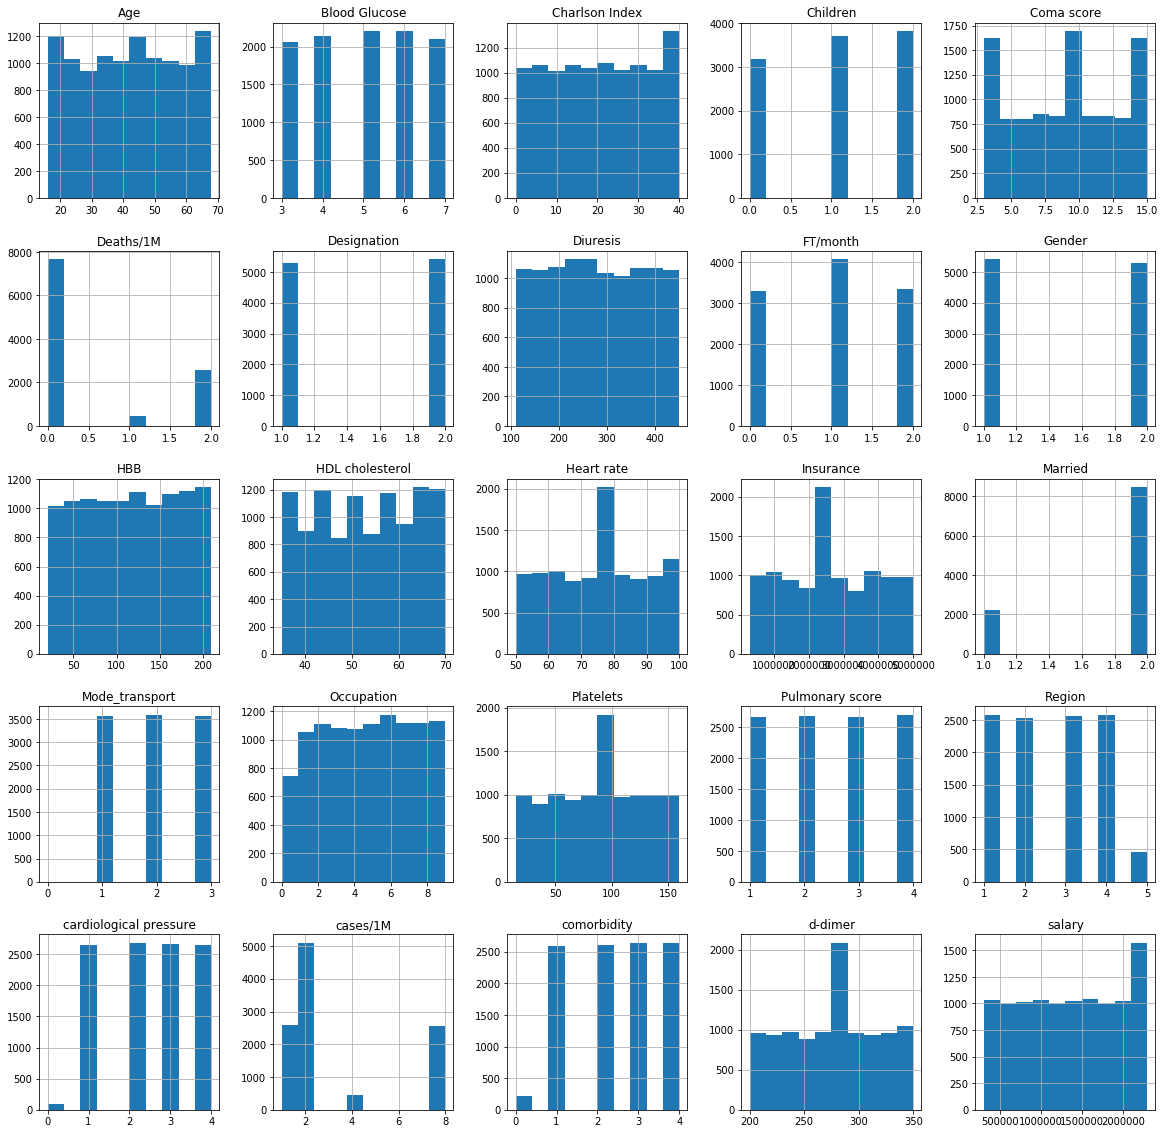

In [332]:
p=x.columns[:28]
q=x[p]
q.hist(figsize=(20,20))
plt.show()


In [1115]:
xtr

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,Blood Glucose_is_missing,Insurance_is_missing,salary_is_missing,FT/month_is_missing,Infect_Prob_is_missing,Name_is_missing,Occupation_is_missing,Mode_transport_is_missing,comorbidity_is_missing,cardiological pressure_is_missing
1450,1451,3,1,2,784,2,1.0,7,3,2,...,False,False,False,False,False,False,False,False,False,False
1333,1334,3,1,2,483,2,0.0,5,1,2,...,False,False,False,True,False,False,False,False,False,False
1830,1831,3,1,2,5111,2,1.0,9,2,2,...,False,False,False,False,False,False,False,False,False,False
4949,9596,1,1,2,2192,2,0.0,3,1,8,...,False,False,False,False,False,False,False,False,False,False
7568,14675,3,2,1,6083,2,1.0,3,1,2,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2418,2419,3,1,2,5163,2,1.0,6,2,2,...,False,False,False,False,False,False,False,False,False,False
9175,16282,4,2,1,4287,2,2.0,9,1,1,...,False,False,False,False,False,False,False,False,False,False
1206,1207,2,1,2,4799,2,1.0,6,1,2,...,False,False,False,False,False,False,False,False,False,False
1270,1271,3,1,2,3571,2,2.0,7,1,2,...,False,False,False,False,False,False,False,False,False,False


## Selected Model :

### => rs_model : using RandomSearchCV


## Testing Data (Problem 1)


In [424]:
data_xls = pd.read_excel('Test_dataset.xlsx', 'Test_dataset', index_col=None)
data_xls.to_csv('Test_dataset().csv', encoding='utf-8')

In [425]:
test=pd.read_csv('Test_dataset().csv',index_col=[0])

In [433]:
test.isna().sum()

people_ID                 0
Region                    0
Gender                    0
Designation               0
Name                      0
Married                   0
Children                  0
Occupation                0
Mode_transport            0
cases/1M                  0
Deaths/1M                 0
comorbidity               0
Age                       0
Coma score                0
Pulmonary score           0
cardiological pressure    0
Diuresis                  0
Platelets                 0
HBB                       0
d-dimer                   0
Heart rate                0
HDL cholesterol           0
Charlson Index            0
Blood Glucose             0
Insurance                 0
salary                    0
FT/month                  0
dtype: int64

In [429]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14498 entries, 0 to 14497
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   people_ID               14498 non-null  int64   
 1   Region                  14498 non-null  category
 2   Gender                  14498 non-null  category
 3   Designation             14498 non-null  category
 4   Name                    14466 non-null  category
 5   Married                 14498 non-null  category
 6   Children                14498 non-null  int64   
 7   Occupation              14498 non-null  category
 8   Mode_transport          14498 non-null  category
 9   cases/1M                14498 non-null  int64   
 10  Deaths/1M               14498 non-null  int64   
 11  comorbidity             14498 non-null  category
 12  Age                     14498 non-null  int64   
 13  Coma score              14498 non-null  int64   
 14  Pulmonary score       

In [428]:
test=to_category(test)

In [430]:
test=numericfill(test)

In [432]:
test=categoryfill(test)

In [434]:
test1=test.drop(["people_ID","Name"],axis=1)

In [435]:
test1.head()

,Region,Gender,Designation,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,...,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,1,1,2,2,2,4,2,4,1,2,...,153,196,240,85,53,17,3,3900000,1300000,1
1,1,2,1,2,2,6,3,4,1,2,...,95,138,241,81,61,2,5,1800000,1300000,1
2,1,1,2,2,2,9,1,4,1,2,...,40,166,236,88,47,24,3,5000000,2000000,2
3,1,1,2,2,2,9,1,4,1,4,...,78,83,211,87,52,13,6,3100000,600000,2
4,1,1,2,2,2,1,1,4,1,2,...,109,207,312,94,68,39,5,2300000,1500000,1


In [436]:
prediction1=rs_model.predict(test1)

In [437]:
dfp1=pd.DataFrame({"people_ID":test["people_ID"],"Predictions_20th_March":prediction1})

In [438]:
dfp1.sort_values(by="people_ID",inplace=True)

### Exporting Data (Problem 1)

In [439]:
dfp1.to_csv("Predictions_20th_March_2020.csv")

## Testing Data (Problem 2)

In [440]:
data27=pd.read_csv("Train_dataset(P1).csv",index_col=[0])

In [441]:
Diuresis_Predicted=pd.read_csv("Diuresis_Predictions.csv",index_col=[0])

In [442]:
data27["Diuresis"]=Diuresis_Predicted["Diuresis_P"]

In [443]:
data27.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1.0,Farmer,Public,2,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2.0,Farmer,Walk,2,...,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1.0,Cleaner,Public,2,...,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.0,Driver,Car,2,...,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,Bhubaneshwar,Female,Mrs,champa karketta,NO,2.0,Manufacturing,Car,2,...,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


In [444]:
data27.isna().sum()

people_ID                    0
Region                       0
Gender                       0
Designation                  0
Name                        20
Married                      0
Children                   311
Occupation                 747
Mode_transport               3
cases/1M                     0
Deaths/1M                    0
comorbidity                226
Age                          0
Coma score                   0
Pulmonary score              0
cardiological pressure      97
Diuresis                     0
Platelets                  924
HBB                         16
d-dimer                   1114
Heart rate                1114
HDL cholesterol             35
Charlson Index               0
Blood Glucose                0
Insurance                 1090
salary                       0
FT/month                   723
Infect_Prob                  0
dtype: int64

In [445]:
data27=to_category(data27)

In [446]:
data27=numericfill(data27)

In [447]:
data27=categoryfill(data27)

In [452]:
data27.drop(["people_ID","Name"],axis=1,inplace=True)

In [453]:
data27.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10714 entries, 0 to 10713
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Region                  10714 non-null  int8   
 1   Gender                  10714 non-null  int8   
 2   Designation             10714 non-null  int8   
 3   Married                 10714 non-null  int8   
 4   Children                10714 non-null  float64
 5   Occupation              10714 non-null  int8   
 6   Mode_transport          10714 non-null  int8   
 7   cases/1M                10714 non-null  int64  
 8   Deaths/1M               10714 non-null  int64  
 9   comorbidity             10714 non-null  int8   
 10  Age                     10714 non-null  int64  
 11  Coma score              10714 non-null  int64  
 12  Pulmonary score         10714 non-null  int8   
 13  cardiological pressure  10714 non-null  int8   
 14  Diuresis                10714 non-null

In [454]:
x1,y1,xtr1,xva1,ytr1,yva1=split(data27)

In [455]:
rs_model.fit(x1,y1)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 11.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [456]:
rs_model.best_params_

{'n_estimators': 400,
 'min_samples_split': 16,
 'min_samples_leaf': 13,
 'max_features': 0.5,
 'max_depth': 10}

In [458]:
prediction2=rs_model.predict(test1)

In [459]:
dfp2=pd.DataFrame({"people_ID":test["people_ID"],"Predictions_27th_March":prediction2})

In [460]:
dfp2.sort_values(by="people_ID",inplace=True)

### Exporting Data (Problem 2)

In [461]:
dfp2.to_csv("Predictions_27th_March_2020.csv")

### Exporting Model

In [463]:
pickle.dump(rs_model,open("random_forest_model(final).pkl","wb"))